In [1]:
import numpy as np
import pandas as pd

In [2]:
h1 = pd.read_csv("halo_data/snap_000.z4.200.AHF_halos", delim_whitespace=True)
h2 = pd.read_csv("halo_data/snap_001.z3.801.AHF_halos", delim_whitespace=True)
h3 = pd.read_csv("halo_data/snap_002.z3.000.AHF_halos", delim_whitespace=True)
h4 = pd.read_csv("halo_data/snap_003.z2.701.AHF_halos", delim_whitespace=True)
h5 = pd.read_csv("halo_data/snap_004.z2.200.AHF_halos", delim_whitespace=True)

In [3]:
h = pd.concat([h1, h2, h3, h4, h5], ignore_index=True)

### Column names: 
http://popia.ft.uam.es/AHF/files/AHF.pdf page 161<br>
(1) ID: halo ID<br>
(2) hostHalo: ID of host halo, 0 (or -l) if halo itself is not a subhalo<br>
(3) numSubStruct: number of subhalos inside halo<br>
(4) Mvir: mass of halo [M_sun/h]<br>
(5) npart: number of particles in halo<br>
(6) Xc: position of halo [kpc/h]<br>
(7) Yc<br>
(8) Zc<br>
(9) VXc: peculiar velocity of halo [km/s]<br>
(10) VYc<br>
(11) Vzc<br>
(12) Rvir: virial radius [kpc/h]<br>
(13) Rmax: position of rotation curve maximum [kpc/h]<br>
(14) r2: position where $\rho$r^2 peaks [kpc/h]<br>
(15) mbp_offset: offset between most bound particle and halo center [kpc/h]<br>
(16) com_offset: offset between center-of-mass and halo center [kpc/h]<br>
(17) Vmax: maximum of rotation curve [km/s]<br>
(18) v_esc: escape velocity at Rvir [km/s]<br>
(19) sigV: 3D velocity dispersion [km/s]<br>
(20) lambda: spin parameter<br>
(21) lambdaE: classical spin parameter<br>
(22) Lx: (orientation of) angular momentum vector |L|=1<br>
(23) Ly<br>
(24) Lz<br>
(25) b: second largest axis of moment of inertia tensor b/a<br>
(26) c: third largest axis of moment of inertia tensor c/a<br>
(27) Eax: largest axis of moment of inertia tensor |Ea|=1<br>
(28) Eay<br>
(29) Eaz<br>
(30) Ebx: second largest axis of moment of inertia tensor |Eb|=1<br>
(31) Eby<br>
(32) Ebz<br>
(33) Ecx: third largest axis of moment of inertia tensor |Ec|=1<br>
(34) Ecy<br>
(35) Ecz<br>
(36) ovdens: overdensity at virial radius<br>
(37) nbins: number of bins used for the \*.AHF_profiles file<br>
(38) fMhirs: mass fraction in high resolution particles for zoom simus<br>
(39) Ekin: kinetic energy [M_sun/h (km/s)^2]<br>
(40) Epot: potential energy [M_sun/h (km/s)^2]<br>
(41) SurfP: surface pressure [M_sun/h (km/s)^2]<br>
(42) PhiO: $\phi$\_0 (cf. unbinding procedure) [(km/s)^2]<br>
(43) cNFW: NFW concentration

In [4]:
h.columns.values

array(['#ID(1)', 'hostHalo(2)', 'numSubStruct(3)', 'Mvir(4)', 'npart(5)',
       'Xc(6)', 'Yc(7)', 'Zc(8)', 'VXc(9)', 'VYc(10)', 'VZc(11)',
       'Rvir(12)', 'Rmax(13)', 'r2(14)', 'mbp_offset(15)',
       'com_offset(16)', 'Vmax(17)', 'v_esc(18)', 'sigV(19)',
       'lambda(20)', 'lambdaE(21)', 'Lx(22)', 'Ly(23)', 'Lz(24)', 'b(25)',
       'c(26)', 'Eax(27)', 'Eay(28)', 'Eaz(29)', 'Ebx(30)', 'Eby(31)',
       'Ebz(32)', 'Ecx(33)', 'Ecy(34)', 'Ecz(35)', 'ovdens(36)',
       'nbins(37)', 'fMhires(38)', 'Ekin(39)', 'Epot(40)', 'SurfP(41)',
       'Phi0(42)', 'cNFW(43)'], dtype=object)

In [5]:
len(h['#ID(1)']) == len(np.unique(h['#ID(1)']))

True

In [6]:
h.head(10)

,#ID(1),hostHalo(2),numSubStruct(3),Mvir(4),npart(5),Xc(6),Yc(7),Zc(8),VXc(9),VYc(10),...,Ecy(34),Ecz(35),ovdens(36),nbins(37),fMhires(38),Ekin(39),Epot(40),SurfP(41),Phi0(42),cNFW(43)
0,7216938310370470672,0,45,7.527270e+12,1444460,10387.869886,6252.167900,25420.557910,-227.80,-135.99,...,0.257628,0.501492,200.0,34,1.0,1.788650e+18,-2.481760e+18,-5.813790e+17,1210320.0,4.42988
1,6473862436012627265,0,8,4.090230e+12,784903,24607.227922,23422.426110,17707.588170,79.68,53.66,...,0.053192,0.363780,200.0,33,1.0,6.351560e+17,-9.505050e+17,-2.590480e+17,944080.0,4.21201
2,5962057879389304555,0,12,3.129310e+12,600506,6850.458551,2118.736911,3661.317280,-221.84,20.99,...,0.211331,0.938994,200.0,32,1.0,4.568530e+17,-6.333220e+17,-1.388920e+17,827417.0,5.67671
3,6026324366557066672,0,14,2.915190e+12,559416,9080.146061,3301.938856,25524.299361,72.52,68.06,...,-0.416875,-0.092131,200.0,32,1.0,3.953240e+17,-5.423440e+17,-1.049690e+17,701603.0,4.72387
4,5802047090423049380,0,11,2.893000e+12,555158,1298.945354,3527.085749,2935.974848,91.95,3.56,...,-0.346652,-0.222994,200.0,32,1.0,3.881510e+17,-5.006640e+17,-1.001450e+17,627188.0,4.97607
5,5995822054379326407,0,12,2.264930e+12,434633,8021.879611,15649.260808,28865.024934,114.01,-92.85,...,0.563615,0.694458,200.0,31,1.0,2.114490e+17,-3.157410e+17,-8.450320e+16,486780.0,3.31961
6,6046330223145106675,0,6,1.930470e+12,370452,9774.218576,12124.795293,14345.236654,-69.05,-172.95,...,0.240557,-0.258104,200.0,31,1.0,2.130820e+17,-2.973920e+17,-6.615220e+16,599502.0,6.12813
7,5863861781612538367,0,10,1.896680e+12,363968,3443.586606,8892.213050,2910.135379,64.14,-170.75,...,-0.534882,0.572721,200.0,30,1.0,1.849750e+17,-2.610690e+17,-5.554070e+16,552660.0,4.09038
8,6251322298750326633,0,11,1.648010e+12,316248,16886.322284,20391.540413,34603.639820,3.10,-91.89,...,-0.312678,-0.305096,200.0,30,1.0,1.479810e+17,-1.972670e+17,-5.341870e+16,470539.0,3.31065
9,6853507539849532823,0,6,1.637650e+12,314261,37778.803297,31842.192992,3335.861332,3.30,16.04,...,0.607290,0.291832,200.0,30,1.0,1.575950e+17,-2.150920e+17,-4.408830e+16,525742.0,5.10590


### Normalization Method

In [7]:
def normalize(df):
    return (df-df.min()) / (df.max()-df.min())

### K Nearest Neighbor Regression

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [9]:
host = h[h['hostHalo(2)']==0]

In [10]:
X = host[['Xc(6)', 'Yc(7)', 'Zc(8)', 'VXc(9)', 'VYc(10)', 'VZc(11)',
          'Rvir(12)', 'Rmax(13)', 'r2(14)', 'mbp_offset(15)',
          'com_offset(16)', 'Vmax(17)', 'v_esc(18)', 'sigV(19)',
          'lambda(20)', 'lambdaE(21)', 'Lx(22)', 'Ly(23)', 'Lz(24)', 
          'ovdens(36)', 'Ekin(39)', 'Epot(40)', 'SurfP(41)']]
y = host[['Mvir(4)']]

In [11]:
X_normalized = normalize(X)
y_normalized = normalize(y)

In [12]:
X_normalized.head(5)

,Xc(6),Yc(7),Zc(8),VXc(9),VYc(10),VZc(11),Rvir(12),Rmax(13),r2(14),mbp_offset(15),...,sigV(19),lambda(20),lambdaE(21),Lx(22),Ly(23),Lz(24),ovdens(36),Ekin(39),Epot(40),SurfP(41)
0,0.259690,0.156298,0.635530,0.357181,0.438860,0.529231,0.634739,0.805403,0.253855,0.039079,...,0.794984,0.055638,0.040012,0.17025,0.13100,0.428500,0.005818,0.166010,0.842819,0.836550
1,0.615180,0.585571,0.442701,0.528666,0.547526,0.641898,0.512401,0.335097,0.482118,0.074716,...,0.632680,0.050792,0.041053,0.68160,0.74810,0.894300,0.005818,0.058951,0.939800,0.927171
2,0.171253,0.052958,0.091535,0.360505,0.528806,0.462022,0.466065,0.400359,0.680919,0.070910,...,0.611865,0.041724,0.031480,0.26040,0.93735,0.535925,0.005818,0.042402,0.959889,0.960952
3,0.226996,0.082540,0.638124,0.524673,0.555776,0.561629,0.454464,0.430891,0.282712,0.135519,...,0.587818,0.024262,0.017674,0.76880,0.43010,0.084250,0.005818,0.036691,0.965651,0.970489
4,0.032462,0.088169,0.073401,0.535510,0.518819,0.537300,0.453236,0.555566,0.374890,0.030829,...,0.584415,0.130761,0.084079,0.71660,0.35930,0.928150,0.005818,0.036025,0.968291,0.971845


In [13]:
y_normalized.head(5)

,Mvir(4)
0,0.255960
1,0.139005
2,0.106307
3,0.099021
4,0.098266


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.3, random_state=0)

In [15]:
clf = KNeighborsRegressor()
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
print(mean_squared_error(y_test, y_pred_knn))

8.072454718773951e-06


In [16]:
for i in range(20):
    print(y_test.values[i], y_pred_knn[i])

[0.00054155] [0.00024708]
[0.00088928] [0.00035444]
[0.00026935] [0.00046587]
[0.00511491] [0.0007937]
[0.00048569] [0.00023996]
[0.00433717] [0.00205355]
[1.36540633e-05] [0.0003194]
[0.00012927] [0.00017541]
[4.75227827e-05] [0.00018211]
[7.09296026e-05] [1.43987314e-05]
[0.00022396] [0.00013519]
[0.00084353] [0.00076994]
[5.85179005e-06] [0.00018346]
[0.00014257] [0.00041402]
[0.00012838] [0.00025957]
[0.00017502] [0.00027141]
[0.00247013] [0.00098911]
[4.96502114e-06] [0.0003411]
[3.5457145e-07] [0.0001171]
[1.70231727e-05] [0.00014005]


### Multi-variate Regression

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Plot distribution of input features

/mnt/bwpy/single/usr/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


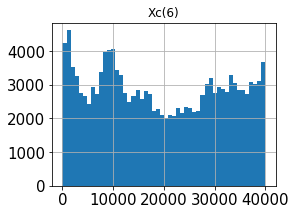

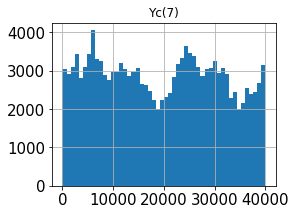

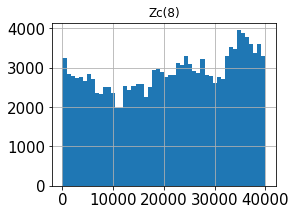

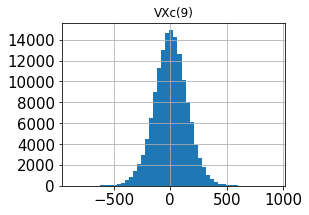

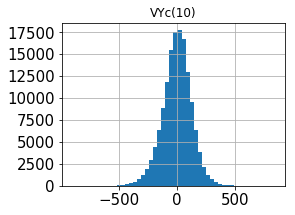

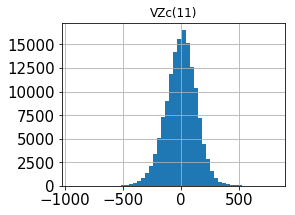

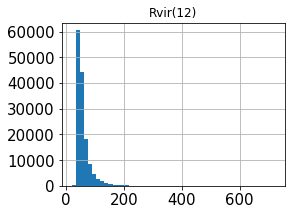

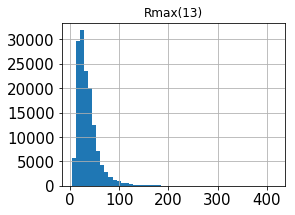

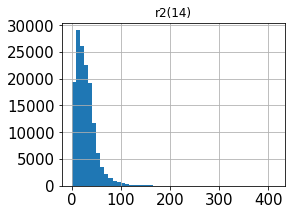

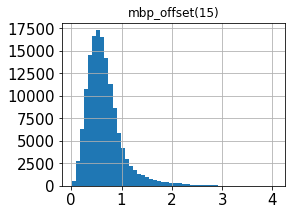

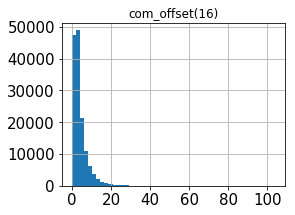

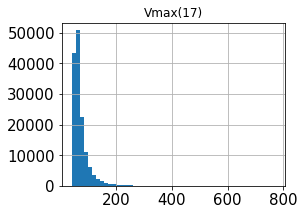

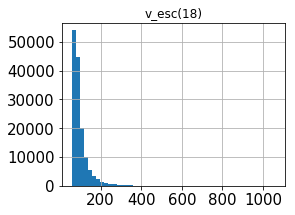

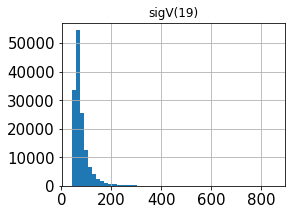

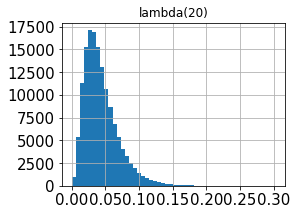

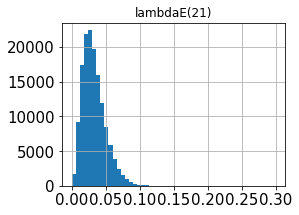

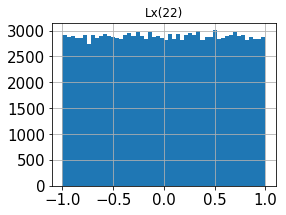

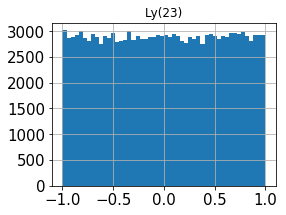

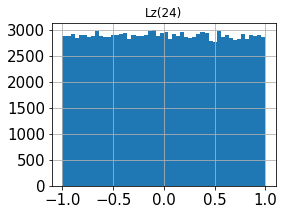

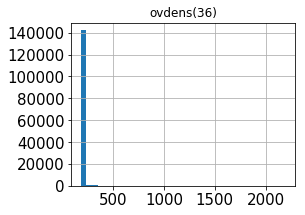

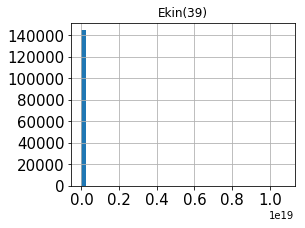

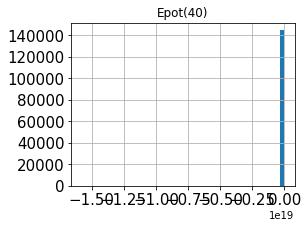

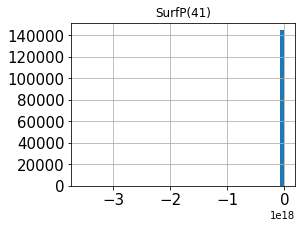

In [19]:
for i in X.columns:
    X.hist(i, bins=50, xlabelsize=15, ylabelsize=15, figsize=(4,3))

#### Plot single-variable scatterplots

In [22]:
import random

In [66]:
sample = random.sample(range(len(X)), 1000)
df = X.join(y)
df_sample = df.iloc[sample]

/mnt/bwpy/single/usr/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


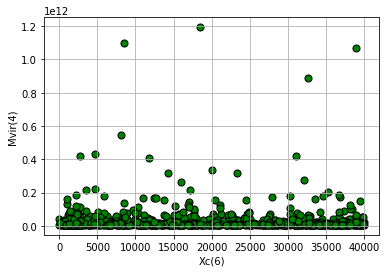

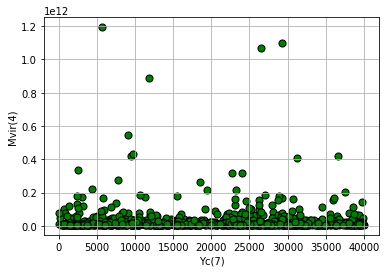

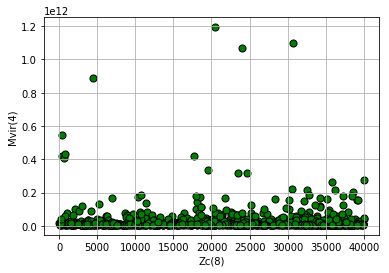

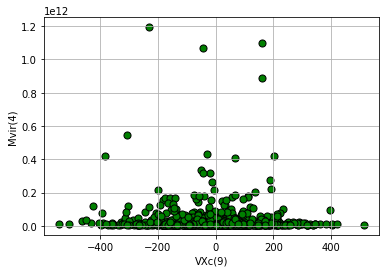

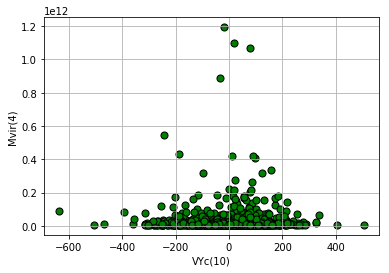

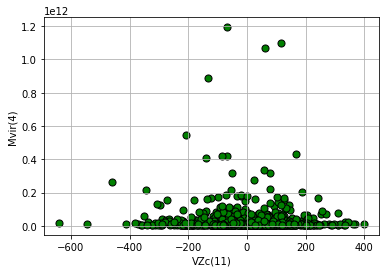

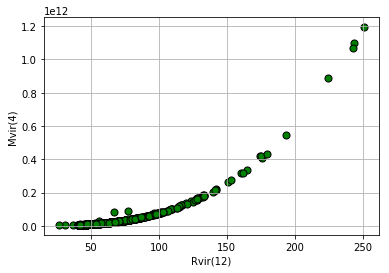

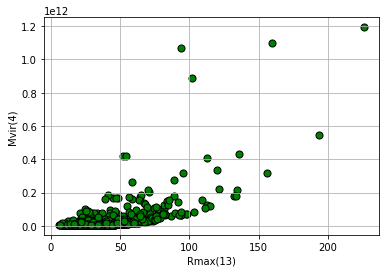

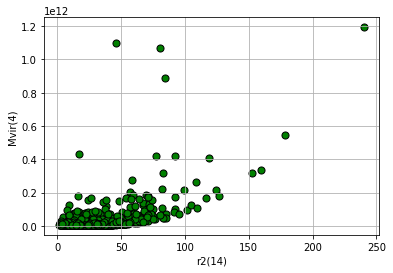

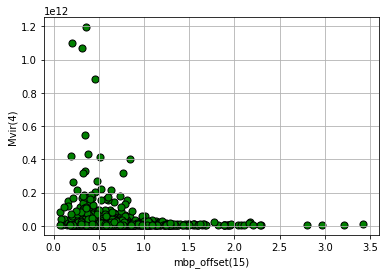

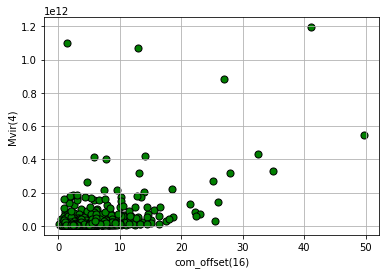

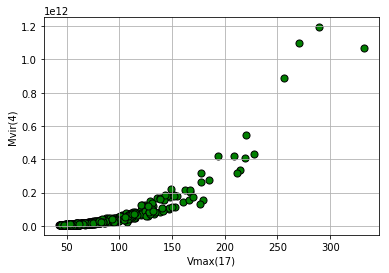

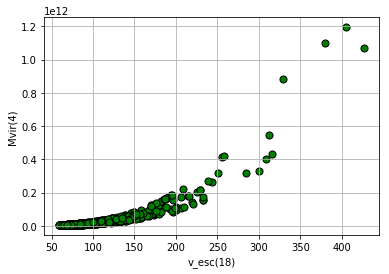

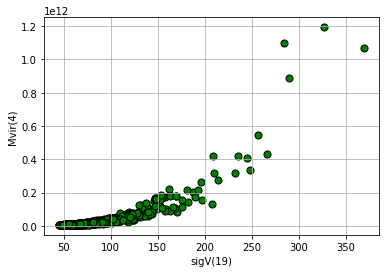

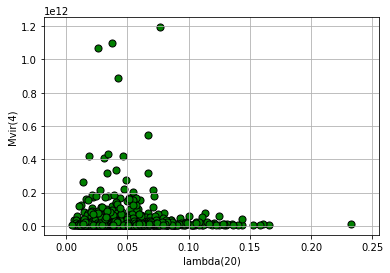

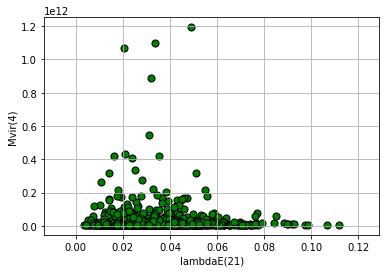

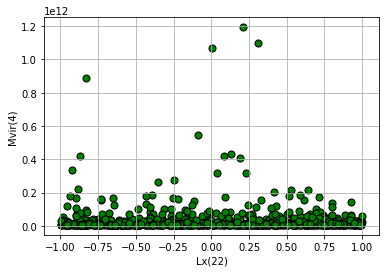

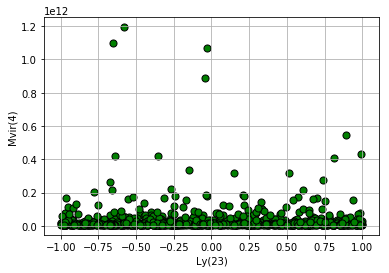

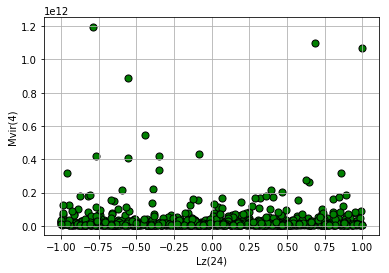

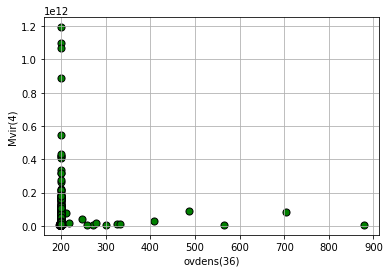

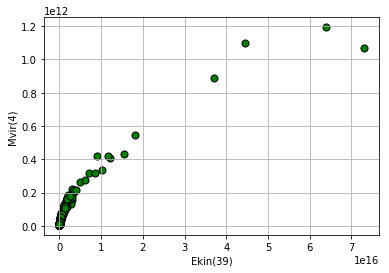

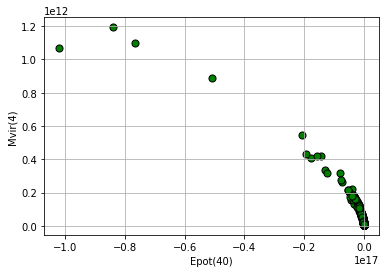

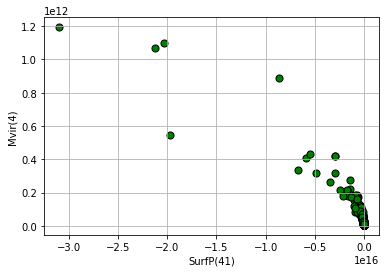

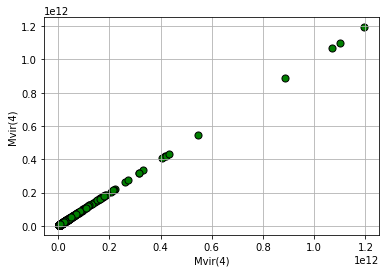

In [68]:
for i in df_sample.columns:
    df_sample.plot.scatter(i, 'Mvir(4)', edgecolors=(0,0,0), s=50, c='g', grid=True)

#### Standard linear regression¶

In [69]:
from sklearn.linear_model import LinearRegression

In [75]:
linear_model = LinearRegression(normalize=True)

In [132]:
linear_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [134]:
y_pred_linear = linear_model.predict(X)

In [135]:
print(mean_squared_error(y, y_pred_linear))

3.897917983443044e+21


In [136]:
for i in range(20):
    print(y.values[i], y_pred_linear[i])

[7.52727e+12] [7.92556107e+12]
[4.09023e+12] [3.09001634e+12]
[3.12931e+12] [2.56991545e+12]
[2.91519e+12] [2.2819491e+12]
[2.893e+12] [2.50002409e+12]
[2.26493e+12] [1.49179498e+12]
[1.93047e+12] [1.53321677e+12]
[1.89668e+12] [1.37891587e+12]
[1.64801e+12] [1.36112511e+12]
[1.63765e+12] [1.28781334e+12]
[1.50483e+12] [1.24664027e+12]
[1.46293e+12] [1.21949324e+12]
[1.43037e+12] [1.02133329e+12]
[1.33439e+12] [9.32805589e+11]
[1.2987e+12] [1.02054319e+12]
[1.28576e+12] [1.11995988e+12]
[1.28063e+12] [9.62634015e+11]
[1.20726e+12] [9.22106033e+11]
[1.18352e+12] [9.29557227e+11]
[1.1262e+12] [9.47813273e+11]


In [137]:
coeff_linear = pd.DataFrame(linear_model.coef_.transpose(), index=X_test.columns, columns=['Linear model coefficients'])
coeff_linear

,Linear model coefficients
Xc(6),1.140168e+03
Yc(7),2.178440e+04
Zc(8),-3.507892e+04
VXc(9),-2.775219e+06
VYc(10),2.540881e+06
VZc(11),2.446234e+06
Rvir(12),3.783559e+08
Rmax(13),1.682271e+08
r2(14),-3.550003e+07
mbp_offset(15),-1.468638e+06


In [138]:
linear_model.score(X, y)

0.8859804126858749

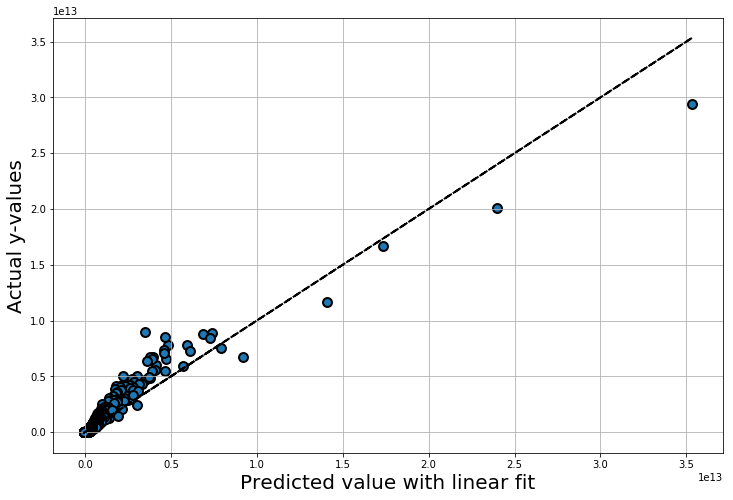

In [139]:
plt.figure(figsize=(12,8))
plt.xlabel("Predicted value with linear fit",fontsize=20)
plt.ylabel("Actual y-values",fontsize=20)
plt.grid(1)
plt.scatter(y_pred_linear,y,edgecolors=(0,0,0),lw=2,s=80)
plt.plot(y_pred_linear,y_pred_linear, 'k--', lw=2)

### Correlation between features

In [153]:
import seaborn as sns

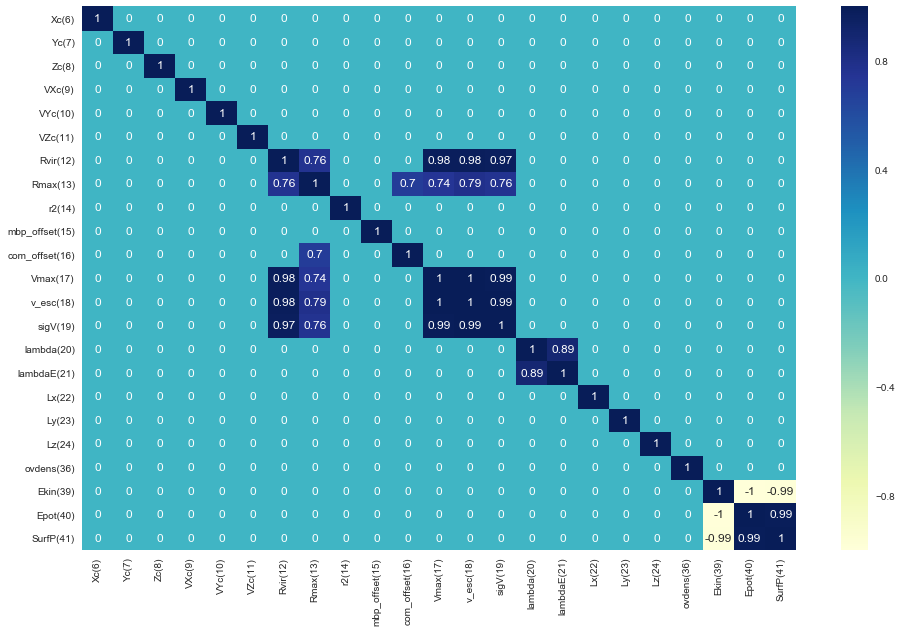

In [154]:
pd.options.display.float_format = '{:,.4f}'.format
corr = X.corr()
corr[np.abs(corr) < 0.65] = 0
plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()